In [2]:
import pandas as pd

data = pd.read_csv("Linhac24-25_Sportlogiq.csv")
colnames = data.columns.to_list()
colnames

['gameid',
 'opposingteamgoalieoniceid',
 'opposingteamid',
 'playerid',
 'teamgoalieoniceid',
 'teamid',
 'teaminpossession',
 'currentpossession',
 'xg_allattempts',
 'compiledgametime',
 'eventname',
 'ishomegame',
 'manpowersituation',
 'opposingteamskatersonicecount',
 'outcome',
 'period',
 'playerprimaryposition',
 'scoredifferential',
 'teamskatersonicecount',
 'type',
 'xadjcoord',
 'yadjcoord']

In [3]:
# 有些列名不认识
# 写个对照表
# 不会破坏原先数据，也能对照翻译
colnames_cn = ["Game ID", "Opposing Team Goalie ID", "Opposing Team ID", "Player ID", "Team Goalie ID","Team ID", "持球队", "当下球权归属", "xG进球可能性", "Game Time", "Event Name", "主场", "场上人数情况", "对方球员数", "Outcome", "Period", "球员位置", "分差", "我方球员数", "Type", "x", "y"]
name_trans_dict = dict(zip(colnames, colnames_cn))
name_trans_dict

{'gameid': 'Game ID',
 'opposingteamgoalieoniceid': 'Opposing Team Goalie ID',
 'opposingteamid': 'Opposing Team ID',
 'playerid': 'Player ID',
 'teamgoalieoniceid': 'Team Goalie ID',
 'teamid': 'Team ID',
 'teaminpossession': '持球队',
 'currentpossession': '当下球权归属',
 'xg_allattempts': 'xG进球可能性',
 'compiledgametime': 'Game Time',
 'eventname': 'Event Name',
 'ishomegame': '主场',
 'manpowersituation': '场上人数情况',
 'opposingteamskatersonicecount': '对方球员数',
 'outcome': 'Outcome',
 'period': 'Period',
 'playerprimaryposition': '球员位置',
 'scoredifferential': '分差',
 'teamskatersonicecount': '我方球员数',
 'type': 'Type',
 'xadjcoord': 'x',
 'yadjcoord': 'y'}

In [4]:
# 初步观察数据
# 只使用Head无法展示全部
# data.head(20)
# 打算缩减数据列
# 比如球员数和场上人数情况一看就重复了，为了概览一下，删掉
# 还有些暂时没用的列，比如坐标
not_vital_col = ['opposingteamskatersonicecount', 'teamskatersonicecount','xadjcoord', 'yadjcoord', 'gameid', 'opposingteamgoalieoniceid', 'teamgoalieoniceid', 'teamid', 'playerid','opposingteamid']
overview = data.drop(not_vital_col, axis=1)
overview.head(20)

,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,outcome,period,playerprimaryposition,scoredifferential,type
0,NaN,NaN,NaN,0.000000,faceoff,1,evenStrength,failed,1,F,0,none
1,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,successful,1,F,0,recovered
2,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,successful,1,F,0,faceoffcontested
3,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,failed,1,F,0,contested
4,885.0,0.0,NaN,2.166667,pass,0,evenStrength,successful,1,F,0,south
5,885.0,0.0,NaN,2.966667,reception,0,evenStrength,successful,1,D,0,regular
6,885.0,0.0,NaN,4.466667,pass,0,evenStrength,failed,1,D,0,north
7,885.0,0.0,NaN,4.700000,block,1,evenStrength,successful,1,F,0,pass
8,814.0,1.0,NaN,6.033333,lpr,1,evenStrength,successful,1,F,0,none
9,814.0,1.0,NaN,6.533333,puckprotection,1,evenStrength,successful,1,F,0,body


In [5]:
# 很多术语和黑话
# count_value然后统计一下
event_terms = overview['eventname'].value_counts().index.to_list()
type_terms = overview['type'].value_counts().index.to_list()
event_terms_dict = {
    "pass": "传球",
    "lpr": "长传",
    "reception": "接球",
    "carry": "持球推进",
    "controlledexit": "带球出本方防区",
    "puckprotection": "护球",
    "block": "封堵射门或传球",
    "faceoff": "争球",
    "shot": "射门",
    "controlledentry": "带球进攻区",
    "controlledentryagainst": "被带球进入己方防区",
    "dumpout": "将球甩出本方防区",
    "dumpin": "将球甩入对方防区",
    "save": "扑球",
    "check": "对抗）",
    "rebound": "篮板",
    "assist": "助攻",
    "icing": "死球（长传不过中线直接进攻区）",
    "goal": "进球",
    "penalty": "犯规",
    "penaltydrawn": "造犯规",
    "offside": "越位",
    "soshot": "点球大战射门",
    "sogoal": "点球大战进球）",
    "sopuckprotection": "点球大战护球"
}
type_terms_dict = {
    # 一般术语
    "regular": "常规",
    "none": "无",
    "contested": "争夺（有对抗）",
    "error": "失误",
    "recovered": "抢回控球权",
    "ice": "冰面（可能指全场）",
    "first": "第一（可能指首轮、首节等）",
    "second": "第二（可能指次轮、次节等）",
    
    # 传球相关
    "pass": "传球",
    "passwithplay": "传球并参与进攻",
    "passwithplaywithshotonnet": "传球并参与进攻且射正",
    "passwithplaywithshotonnetandslotshot": "传球并参与进攻，射正且在槽区（slot）射门",
    "passwithslotshot": "传球并在槽区射门",
    "passwithshotonnet": "传球并射正",
    "passwithshotonnetandslotshot": "传球并射正且在槽区射门",
    
    # 带球相关
    "carry": "控球推进",
    "carrywithplay": "带球并参与进攻",
    "carrywithplaywithshotonnet": "带球参与进攻并射正",
    "carrywithplaywithshotonnetandslotshot": "带球参与进攻，射正且在槽区射门",
    "carrywithplaywithslotshot": "带球参与进攻并在槽区射门",
    "carrywithshotonnet": "带球并射正",
    "carrywithshotonnetandslotshot": "带球射正且在槽区射门",
    "carrywithslotshot": "带球并在槽区射门",

    # 进攻/出区相关
    "ozentry": "进攻区进入",
    "ozentryoffboards": "沿边墙进入进攻区",
    "ozentrystretch": "长距离进攻区进入",
    "ozentrystretchoffboards": "沿边墙长距离进入进攻区",
    
    # dump（甩球）相关
    "dump": "甩球",
    "opdump": "对手甩球",
    "opdumpcontested": "对手甩球并发生争夺",
    "hipresopdump": "高位压迫导致对手甩球",
    "hipresopdumpcontested": "高位压迫导致对手甩球并发生争夺",
    
    # 传球方向
    "north": "向前（北向）",
    "south": "向后（南向）",
    "northoffboards": "沿边墙向前传球",
    "southoffboards": "沿边墙向后传球",
    "eastwest": "横向传球",
    "eastwestoffboards": "沿边墙横向传球",
    
    # 争球（Faceoff）
    "faceoff": "争球",
    "faceoffcontested": "争球争夺",
    
    # 其他进攻术语
    "slot": "槽区（高危射门区域）",
    "slotblocked": "槽区射门被封堵",
    "outside": "外围（远离槽区）",
    "outsideblocked": "外围射门被封堵",
    "rush": "快速进攻",
    
    # 失误/抢回相关
    "errorcontested": "失误且被争夺",
    "recoveredwithexit": "抢回控球权并出区",
    "recoveredwithentry": "抢回控球权并进攻区进入",
    "recoveredwithshotonnet": "抢回控球权并射正",
    "recoveredwithshotonnetandslotshot": "抢回控球权并射正且在槽区射门",
    "recoveredwithslotshot": "抢回控球权并在槽区射门",
    
    # 物理对抗
    "body": "身体对抗",
    "stick": "球杆对抗",
    "check": "冲撞",
    
    # 1v1, 2v2 等
    "1on0": "一对零",
    "1on1": "一对一",
    "1on2": "一对二",
    "2on1": "二对一",
    "2on2": "二对二",
    "2on3": "二对三",
    "3on1": "三对一",
    "3on2": "三对二",
    "3on3": "三对三",
    
    # 犯规相关
    "tripping": "绊人",
    "hooking": "勾人",
    "holding": "拉扯",
    "slashing": "挥杆犯规",
    "interference": "阻挡",
    "highsticking": "高杆击打",
    "crosschecking": "双手推杆犯规",
    "boarding": "推撞犯规",
    "goalieinterference": "干扰守门员",
    "holdingthestick": "抓住对方球杆",
    "delayofgame": "延误比赛",
    "unsportsmanlikeconduct": "违反体育道德",
    "kneeing": "膝撞",
    "illegalchecktothehead": "头部非法冲撞",
    "charging": "蓄意冲撞",
    "elbowing": "肘击",
    "otherinfraction": "其他犯规",
    "otherundisciplined": "其他违规行为",
    "toomanymen": "场上人数过多",
    "puckoverglass": "将球直接打出场外"
}

# 有几个概念还不是很清楚
# 比如防区这种东西
print(event_terms)
print(type_terms)

['pass', 'lpr', 'reception', 'carry', 'controlledexit', 'puckprotection', 'block', 'faceoff', 'shot', 'controlledentry', 'controlledentryagainst', 'dumpout', 'dumpin', 'save', 'check', 'rebound', 'assist', 'icing', 'goal', 'penalty', 'penaltydrawn', 'offside', 'soshot', 'sogoal', 'sopuckprotection']
['regular', 'none', 'contested', 'pass', 'south', 'deke', 'outlet', 'd2d', 'slot', 'north', 'northoffboards', 'error', 'carrywithplay', 'opdump', 'eastwest', 'd2doffboards', 'passwithplay', 'dump', 'outside', 'body', 'faceoff', 'carry', 'outletoffboards', 'stick', 'rebound', 'boards', 'recovered', 'ozentry', 'southoffboards', 'stretch', 'shot', '3on3', 'ice', 'outsideblocked', '1on2', 'hipresopdumpcontested', 'hipresopdump', 'rush', '2on2', '2on3', 'faceoffcontested', 'carrywithplaywithshotonnetandslotshot', 'recoveredwithentry', 'errorcontested', 'nofore', 'recoveredwithexit', 'flip', 'carrywithplaywithshotonnet', 'blueline', 'reboundcontested', 'stretchoffboards', 'slotblocked', 'chip', '

In [6]:
# 观察event和type这两列的组合值的计数
combinations = data.value_counts(subset=['eventname', 'type']).reset_index(name='count')
combinations.to_csv("combinations_counts.csv", index=False, sep='\t')
print(combinations)

        eventname                type  count
0       reception             regular  97372
1             lpr                none  35467
2           carry                none  33914
3             lpr           contested  25812
4            pass               south  20800
..            ...                 ...    ...
137       penalty     otherinfraction      2
138        soshot             outside      2
139  penaltydrawn            elbowing      1
140  penaltydrawn  otherundisciplined      1
141       penalty            elbowing      1

[142 rows x 3 columns]


In [7]:
# 某一队持球时，事件发生的位置
# game list
# game id 作为主键的关系
game_col = data['gameid']
games = game_col.value_counts().index.to_list()
game1_id = 64485
# print(games)
game1 = data.loc[data['gameid']==game1_id] 
# team list
team1, team2 = game1['teamid'].value_counts().index.to_list()

# team1 持球位置
position_cols = ['teaminpossession', 'period' ,'compiledgametime' , 'xadjcoord', 'yadjcoord']
position = ['xadjcoord', 'yadjcoord']
position1 = game1.query(f'teaminpossession == {team1}')[position_cols]
position2 = game1.query(f'teaminpossession == {team2}')[position_cols]
position1.head(5)


,teaminpossession,period,compiledgametime,xadjcoord,yadjcoord
94503,885.0,1,0.44,-0.708763,1.262848
94504,885.0,1,0.48,-0.708763,1.262848
94505,885.0,1,1.24,-28.873466,5.286381
94506,885.0,1,2.60,-35.914642,3.777557
94507,885.0,1,3.12,-37.926411,-17.848915


In [9]:
import pandas as pd

# 假设原始数据已加载为data DataFrame
# data = pd.read_csv('your_data.csv')

# ==================== 基础信息聚合 ==================== 
player_info = data.groupby('playerid').agg(
    # 使用first()基于假设：球员在同一数据集中不更换队伍
    team_id=('teamid', 'first'),  # 所属队伍ID
    primary_position=('playerprimaryposition', 'first'),  # 主要场上位置
    
    # 比赛参与度指标
    total_games=('gameid', 'nunique'),  # 参与的不同比赛数量
    total_time=('compiledgametime', lambda x: x.max() - x.min()),  # 总出场时间（需确认时间计算逻辑）
    
    # 进攻指标
    total_shots=('eventname', lambda x: x.isin(['shot','soshot']).sum()),  # 总射门次数
    goals=('eventname', lambda x: x.isin(['goal','sogoal']).sum()),  # 进球数
    controlled_entries=('eventname', lambda x: x.isin(['controlledentry']).sum()),  # 控球进入进攻区次数
    
    # 传球指标
    total_passes=('type', lambda x: x.str.contains('pass').sum()),  # 所有类型传球尝试
    successful_passes=('outcome', lambda x: (x == 'successful').sum()),  # 成功传球次数
    
    # 控球指标
    carries=('type', lambda x: x.str.contains('carry').sum()),  # 所有带球动作
    successful_carries=('type', lambda x: x.isin(['carry','carrywithplay']).sum()),  # 成功带球
    
    # 防守指标
    blocks=('eventname', lambda x: x.isin(['block']).sum()),  # 封堵次数
    checks=('eventname', lambda x: x.isin(['check']).sum()),  # 冲撞次数
    
    # 特殊事件
    faceoffs_won=('type', lambda x: x.str.contains('faceoff').sum()),  # 争球胜利
    penalties=('eventname', lambda x: x.isin(['penalty']).sum())  # 犯规次数
).reset_index().rename(columns={'playerid':'player_id'})  # 明确设置主键列名

# ==================== 队伍对抗信息 ====================
team_stats = data.groupby(['playerid', 'teamid']).agg(
    avg_teammates=('teamskatersonicecount', 'mean'),  # 平均队友数量
    avg_opponents=('opposingteamskatersonicecount', 'mean'),  # 平均对手数量
    most_common_opponent=('opposingteamid', lambda x: x.mode()[0])  # 最常见对手
).reset_index().rename(columns={'playerid':'player_id'})

# ==================== 合并数据 ====================
player_info = pd.merge(
    player_info,
    team_stats,
    left_on=['player_id', 'team_id'],
    right_on=['player_id', 'teamid']
).drop(columns='teamid')

# ==================== 计算衍生指标 ====================
# 成功率类指标
player_info['shot_success_rate'] = player_info['goals'] / player_info['total_shots'].replace(0, 1)  # 防止除零
player_info['pass_success_rate'] = player_info['successful_passes'] / player_info['total_passes'].replace(0, 1)

# 高级复合指标
player_info['possession_quality'] = (
    player_info['controlled_entries'] * 0.3 +
    player_info['successful_carries'] * 0.2 +
    player_info['successful_passes'] * 0.5
)

player_info['defensive_score'] = (
    player_info['blocks'] * 1.2 +
    player_info['checks'] * 0.8 -
    player_info['penalties'] * 1.5
)

# 空间利用率指标（需要处理可能的空值）
zone_data = data.groupby('playerid')['xadjcoord'].mean().reset_index().rename(columns={
    'playerid':'player_id',
    'xadjcoord':'offensive_zone_ratio'
})
player_info = pd.merge(player_info, zone_data, on='player_id', how='left')

# ==================== 最终整理 ====================
# 设置主键
player_info.set_index('player_id', inplace=True)

# 处理可能的空值
player_info.fillna({
    'shot_success_rate': 0,
    'pass_success_rate': 0,
    'offensive_zone_ratio': data['xadjcoord'].median()
}, inplace=True)

# 列排序优化
column_order = [
    'team_id', 'primary_position', 'total_games', 'total_time',
    'total_shots', 'goals', 'shot_success_rate', 
    'total_passes', 'successful_passes', 'pass_success_rate',
    'carries', 'successful_carries', 'controlled_entries',
    'blocks', 'checks', 'penalties', 'faceoffs_won',
    'avg_teammates', 'avg_opponents', 'most_common_opponent',
    'possession_quality', 'defensive_score', 'offensive_zone_ratio'
]
player_info = player_info[column_order]
# 保存结果
player_info.to_csv('player_analytics.csv')



In [18]:
# ==================== 使用示例 ====================
# 查看前5名球员
player_info.head()


,team_id,primary_position,total_games,total_time,total_shots,goals,shot_success_rate,total_passes,successful_passes,pass_success_rate,...,blocks,checks,penalties,faceoffs_won,avg_teammates,avg_opponents,most_common_opponent,possession_quality,defensive_score,offensive_zone_ratio
player_id,,,,,,,,,,,,,,,,,,,,,
1338,524,F,16,3509.68,15,1,0.066667,65,493,7.584615,...,24,7,1,17,4.951735,5.001508,634,258.6,32.9,2.954695
2099,877,F,1,2205.28,0,0,0.000000,2,25,12.500000,...,0,0,0,1,5.000000,5.000000,628,13.0,0.0,-2.800346
3467,503,D,22,3888.16,54,0,0.000000,104,1743,16.759615,...,95,46,7,23,4.948730,4.993533,825,883.3,140.3,-37.049500
5038,877,F,22,3876.36,99,13,0.131313,149,1645,11.040268,...,50,28,4,27,4.992165,4.839373,795,856.9,76.4,28.733050
10739,628,G,4,3832.88,0,0,0.000000,5,230,46.000000,...,2,1,0,0,4.904594,4.918728,877,115.0,3.2,-75.583278


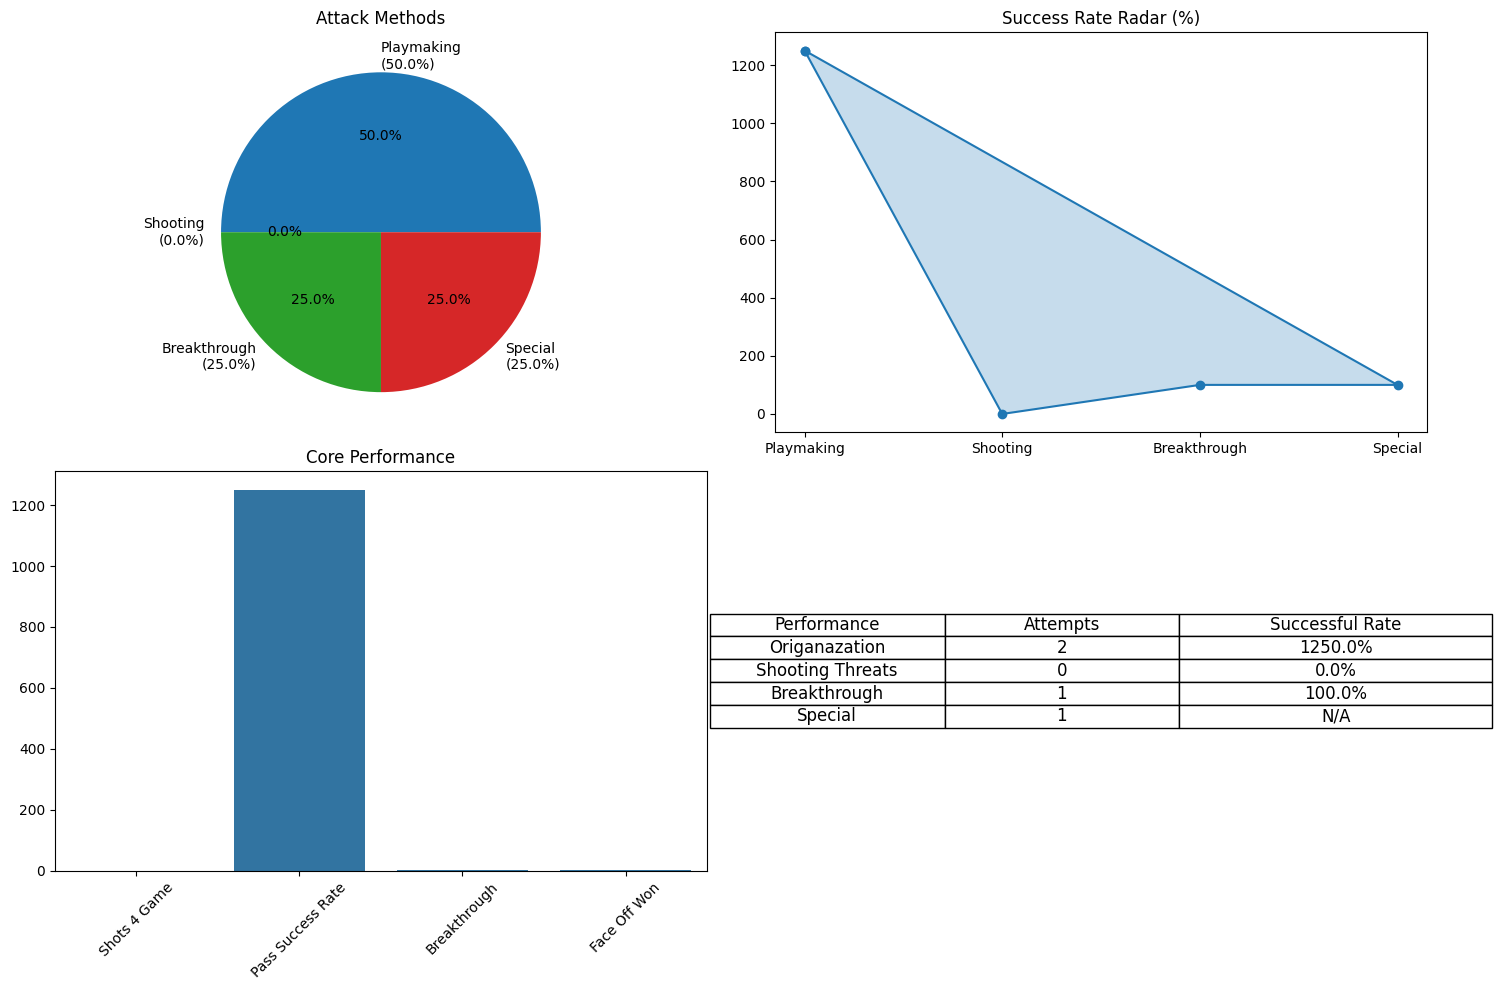

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ====================
# 1. 进攻分类定义模块
# ====================
"""
进攻方式分类标准：
1. Playmaking (组织进攻) - 传球创造机会
   - 包含指标：total_passes, successful_passes, pass_success_rate
   
2. Shooting (射门威胁) - 直接得分能力
   - 包含指标：total_shots, goals, shot_success_rate
   
3. Breakthrough (突破控球) - 持球推进能力
   - 包含指标：carries, successful_carries, controlled_entries
   
4. Special (特殊战术) - 关键对抗能力
   - 包含指标：faceoffs_won
"""

# ====================
# 进攻画像生成函数
# ====================
# ====================
# 2. 进攻画像生成函数
# ====================
def create_attack_profile(player_df, attack_categories):
    """
    生成球员进攻画像（适配当前数据结构版）
    参数：
        player_df: 包含以下字段的DataFrame：
            - total_passes, successful_passes, pass_success_rate
            - total_shots, goals, shot_success_rate
            - carries, successful_carries, controlled_entries
            - faceoffs_won
    """
    profile = player_df[[]].copy()  # 创建空框架保留索引
    
    # 通用指标处理
    for category in ['playmaking', 'shooting', 'breakthrough']:
        attempts, success, rate = attack_categories[category]
        profile[f'{category}_attempts'] = player_df[attempts]
        profile[f'{category}_success'] = player_df[success]
        profile[f'{category}_rate'] = player_df[rate]
    
    # 特殊分类处理（仅展示次数）
    profile['special_attempts'] = player_df['faceoffs_won']  # 直接使用获胜次数
    profile['special_success'] = player_df['faceoffs_won']   # 无失败数据时设为相同值
    profile['special_rate'] = 1.0  # 成功率设为100%（因无失败记录）

    # 计算进攻方式占比
    total_attempts = profile.filter(like='_attempts').sum(axis=1)
    for category in attack_categories.keys():
        profile[f'{category}_ratio'] =profile[f'{category}_attempts'] / total_attempts.replace(0, 1)
    
    return profile

# ====================
# 3. 可视化函数调整
# ====================
def plot_attack_profile(player_id, profile_df, player_info):
    """
    优化后的可视化函数
    """
    # 获取数据
    try:
        player_data = profile_df.loc[player_id]
        base_info = player_info.loc[player_id]
    except KeyError:
        print(f"Player ID {player_id} does not exist")
        return

    # 创建画布
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. 进攻方式分布饼图
    categories = list(attack_categories.keys())
    ratios = [player_data[f'{cat}_ratio'] for cat in categories]
    labels = [f"{cat.capitalize()}\n({rat*100:.1f}%)" for cat, rat in zip(categories, ratios)]
    ax[0, 0].pie(ratios, labels=labels, autopct='%1.1f%%')
    ax[0, 0].set_title('Attack Methods')

    # 2. 关键指标雷达图
    success_rates = [player_data[f'{cat}_rate'] * 100 for cat in categories]
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    success_rates += success_rates[:1]
    
    ax[0, 1].plot(angles, success_rates, 'o-')
    ax[0, 1].fill(angles, success_rates, alpha=0.25)
    ax[0, 1].set_xticks(angles[:-1])
    ax[0, 1].set_xticklabels([cat.capitalize() for cat in categories])
    ax[0, 1].set_title('Success Rate Radar (%)')

    # 3. 核心指标对比
    metrics = {
        'Shots 4 Game': base_info['total_shots'] / base_info['total_games'],
        'Pass Success Rate': player_data['playmaking_rate'] * 100,
        'Breakthrough': player_data['breakthrough_attempts'],
        'Face Off Won': player_data['special_attempts']
    }
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=ax[1, 0])
    ax[1, 0].set_title('Core Performance')
    ax[1, 0].tick_params(axis='x', rotation=45)

    # 4. 数据表格
    table_data = [
        ["Performance", "Attempts", "Successful Rate"],
        ["Origanazation", 
         int(player_data['playmaking_attempts']), 
         f"{player_data['playmaking_rate']*100:.1f}%"],
        ["Shooting Threats", 
         int(player_data['shooting_attempts']), 
         f"{player_data['shooting_rate']*100:.1f}%"],
        ["Breakthrough", 
         int(player_data['breakthrough_attempts']), 
         f"{player_data['breakthrough_rate']*100:.1f}%"],
        ["Special", 
         int(player_data['special_attempts']), 
         "N/A"]  # 特殊分类无成功率数据
    ]
    ax[1, 1].axis('off')
    table = ax[1, 1].table(
        cellText=table_data,
        colWidths=[0.3, 0.3, 0.4],
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()

# 生成进攻画像
attack_categories = {
    'playmaking': ['total_passes', 'successful_passes', 'pass_success_rate'],
    'shooting': ['total_shots', 'goals', 'shot_success_rate'],
    'breakthrough': ['carries', 'successful_carries', 'controlled_entries'],
    'special': ['faceoffs_won']  # 特殊处理需调整原始数据
}


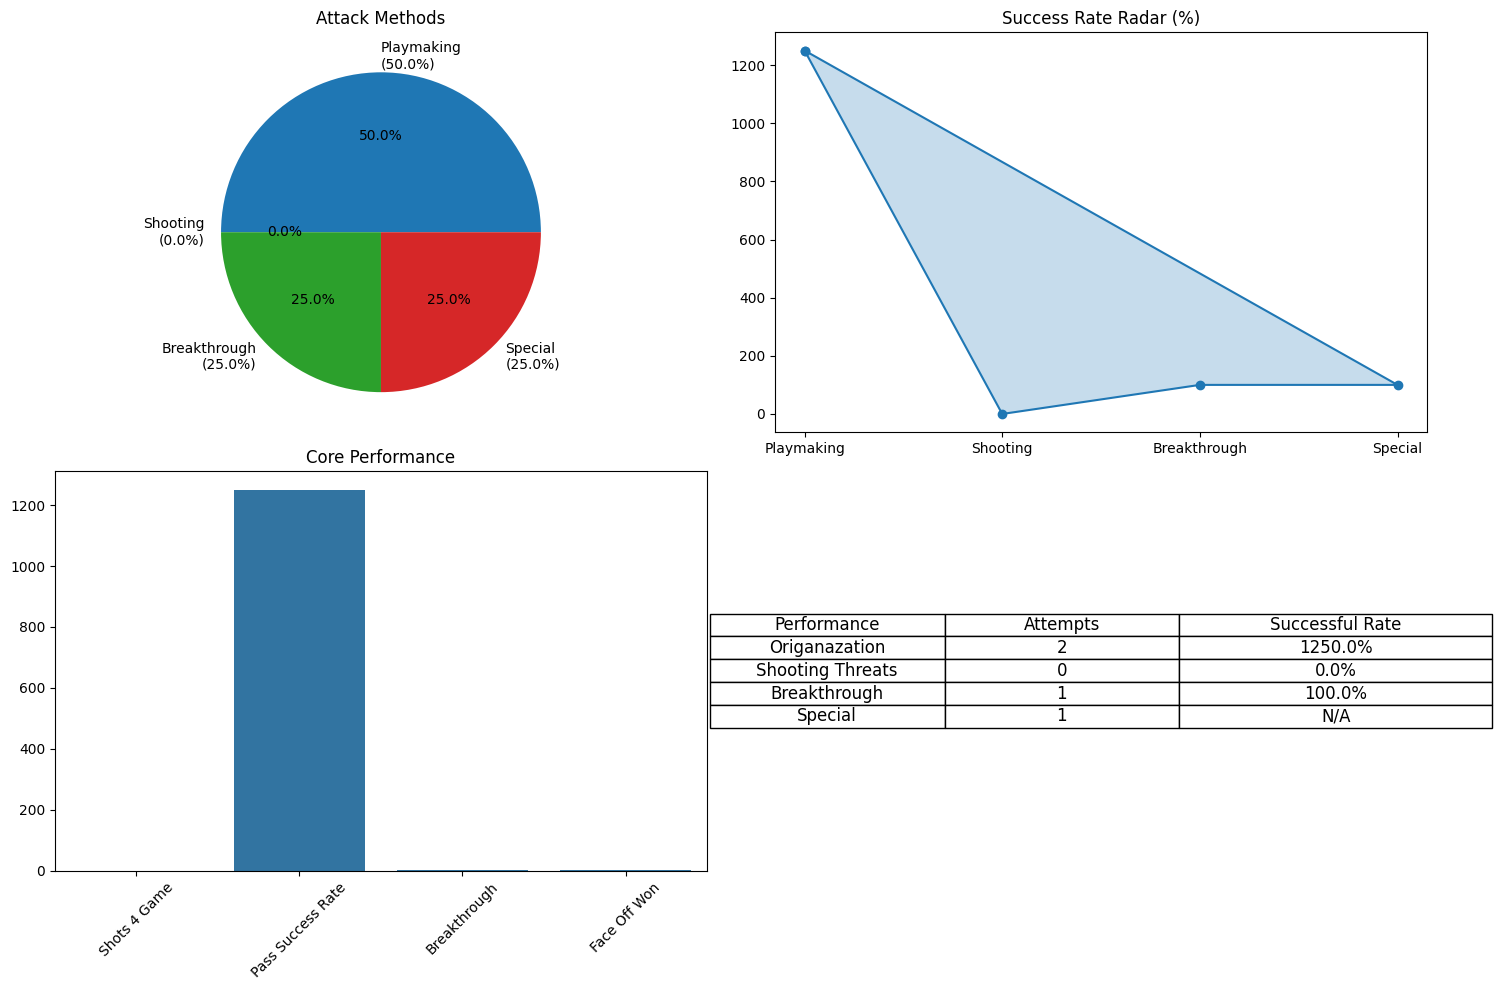

In [36]:
attack_profile = create_attack_profile(player_info, attack_categories)

# 可视化示例（使用索引定位）
plot_attack_profile(2099, attack_profile, player_info)
